In [42]:
'''
Q1) Implement K-means algorithm.
Author: Subhra Shankha Bhattacherjee
Roll: EE19MTECH01008
'''

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
def cluster(centroids,img):
    b = []
    c = []
    for i in range(len(img)):
        for j in range(len(img[0])):
            a = []
            for k in range(len(centroids)):
                a.append(np.linalg.norm(centroids[k]-img[i][j]))
            b.append(a.index(min(a)))
            c.append(img[i][j])
    return np.array(b),(np.array(c))

In [44]:
def centroid(b,c,K,points_p_clus):
    centrd = 0
    centrd1 = []
    for j in range(K):
        centrd = np.mean(c[np.argwhere(b==j)],axis=0)
        centrd1.append(centrd)
    return np.array(centrd1)

In [45]:
def showcluster(centroids,img,k):
    b = []
    c = []
    d = np.full(img.shape,0)
    for i in range(len(img)):
        for j in range(len(img[0])):
            a = []
            for k in range(len(centroids)):
                a.append(np.linalg.norm(centroids[k]-img[i][j]))
            if a.index(min(a)) == k:
                d[i][j] = img[i][j]
    v = np.reshape(d,img.shape)
    plt.imshow(v)
      

In [46]:
pic = Image.open('color.jpg')
img = np.array(pic)

In [47]:
### user inputs
print("enter number of clusters :")
k = int(input())
print("enter threshold e :")
cnvrge_dist = float(input())

#random initialization of centroid is having issue

cntrd = []
for i in range(k):
    (w,h)=int(np.random.normal(len(img)/5,len(img)/5)),int(np.random.normal(len(img[0])/5,len(img)/5))
    cntrd.append(img[w][h])


enter number of clusters :
3
enter threshold e :
1


In [48]:
b,c = cluster(cntrd,img)

In [49]:
print(b.shape,c.shape)
clusterpoints = []
for i in range(k):
    clusterpoints.append(np.count_nonzero(b==i))
print(clusterpoints)

((391876,), (391876, 3))
[55101, 141561, 195214]


In [50]:
new_cntrd = centroid(b,c,k,clusterpoints)
print(new_cntrd)

[[[144.01582548 171.96971017 135.87619099]]

 [[188.97995211 179.61427229 185.8965393 ]]

 [[227.37312385 203.02343582 199.41431455]]]


In [51]:
new_cntrd = []
diff = cnvrge_dist+1
while(diff>cnvrge_dist):
    b,c = cluster(cntrd,img)
    points_per_cluster = []
    for i in range(k):
        clusterpoints.append(np.count_nonzero(b==i))
    new_cntrd = centroid(b,c,k,clusterpoints)
    diff = np.linalg.norm(new_cntrd-cntrd)
    print(diff)
    cntrd = new_cntrd

394.6449771647897
63.484146184547
85.0976985313985
30.77187665792857
4.830123167462964
0.1789129236493109


In [57]:
clusterpoints = []
for i in range(k):
    clusterpoints.append(np.count_nonzero(b==i))
print(clusterpoints)

[111860, 138095, 141921]


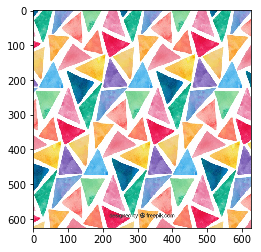

In [53]:
plt.imshow(img)

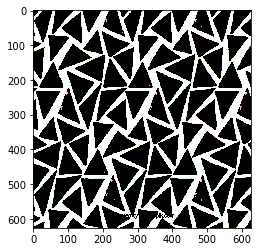

In [58]:
showcluster(cntrd,img,k)